In [5]:
import requests
import pandas as pd

# Define the API endpoint,record_date:gt:2022-04-17
api_url = 'https://api.fiscaldata.treasury.gov/services/api/fiscal_service/v1/accounting/dts/operating_cash_balance?filter=record_date:gt:2022-04-17&page[size]=10000'

# Make a GET request to the API
response = requests.get(api_url)

# Check if the request was successful
if response.status_code == 200:
    # Get JSON response data
    data = response.json()
    
    # Assuming your data is in the 'data' key
    records = data.get('data', [])
    
    # Convert the data to a Pandas DataFrame
    df = pd.DataFrame(records)
    
    # Check the first few rows of the DataFrame
    #print(df)
else:
    print(f'Failed to get data: {response.status_code}')


# Filter the rows based on the specified account types
account_types = [
    "Treasury General Account (TGA) Opening Balance",
    "Total TGA Deposits (Table II)",
    "Total TGA Withdrawals (Table II) (-)",
    "Treasury General Account (TGA) Closing Balance"
]

filtered_df = df[df['account_type'].isin(account_types)]

# Pivot the DataFrame to create a new table
pivot_table = filtered_df.pivot(index='record_date', columns='account_type', values='open_today_bal')


# Display the new table
pivot_table

account_type,Total TGA Deposits (Table II),Total TGA Withdrawals (Table II) (-),Treasury General Account (TGA) Closing Balance,Treasury General Account (TGA) Opening Balance
record_date,,,,
2022-04-18,284332,21553,841253,578473
2022-04-19,196259,144162,893351,841253
2022-04-20,62733,48558,907526,893351
2022-04-21,186374,175023,918877,907526
2022-04-22,37033,21672,934238,918877
...,...,...,...,...
2023-10-31,454211,459768,832412,837969
2023-11-01,36466,115871,753008,832412
2023-11-02,290379,255259,788127,753008


In [ ]:
We created pivot table 
TGA Opening Balance + TGA Deposits - TGA Withdrawal = TGA Closing Balance

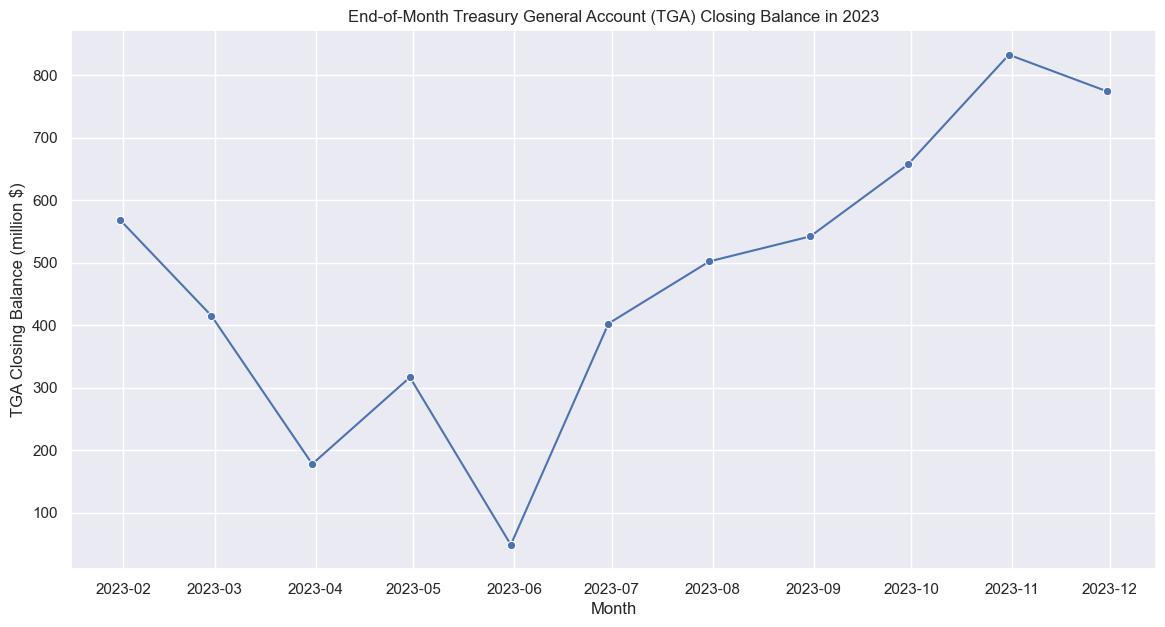

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
# Assuming filtered_df is already defined and contains 'account_type' and 'open_today_bal'

# First, ensure that 'open_today_bal' is a string if it's not already
filtered_df['open_today_bal'] = filtered_df['open_today_bal'].astype(str)

# Now replace commas and dollar signs (if any) and convert to numeric
filtered_df['open_today_bal'] = pd.to_numeric(
    filtered_df['open_today_bal'].str.replace(',', '').str.replace('$', ''), 
    errors='coerce'
)

# Ensure 'record_date' is a datetime object
filtered_df['record_date'] = pd.to_datetime(filtered_df['record_date'])

# Pivot the DataFrame
pivot_table = filtered_df.pivot_table(
    values='open_today_bal',
    index='record_date',
    columns='account_type',
    aggfunc='last'  # Use 'last' to get the final entry of the period
)

# Resample to get the last entry of each month
monthly_closing_balance = pivot_table['Treasury General Account (TGA) Closing Balance'].resample('M').last()

# Filter out dates outside the desired range (January 2023 to November 2023)
monthly_closing_balance = monthly_closing_balance['2023-01-01':'2023-11-30']

# Set the Seaborn theme
sns.set_theme(style="darkgrid")

# Plot the "Treasury General Account (TGA) Closing Balance"
plt.figure(figsize=(14, 7))  # Set figure size
sns.lineplot(data=monthly_closing_balance, marker='o')  # Use marker to denote each data point

# Label the plot for better understanding
plt.title('End-of-Month Treasury General Account (TGA) Closing Balance in 2023')
plt.xlabel('Month')
plt.ylabel('TGA Closing Balance (Billion $)')

# Define a custom ticker function to format y-axis labels
def millions(x, pos):
    'The two args are the value and tick position'
    return f'{int(x/1000)}'

# Apply the custom ticker function to the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(millions))
# Display the plot with the new formatted y-axis
plt.show()
# Display the plot
plt.show()

In [24]:
# Get the last row (last day's variables)
last_day_variables = pivot_table.tail(1)

# Print the last day's variables
last_day_variables

account_type,Total TGA Deposits (Table II),Total TGA Withdrawals (Table II) (-),Treasury General Account (TGA) Closing Balance,Treasury General Account (TGA) Opening Balance
record_date,,,,
2023-11-06,24573,13780,774170,763377


In [ ]:
Dont remember the rule 
TGA Opening Balance + TGA Deposits - TGA Withdrawal = TGA Closing Balance

In [49]:
# Assuming pivot_table is already defined as follows:
# pivot_table = filtered_df.pivot_table(
#     values='open_today_bal',
#     index='record_date',
#     columns='account_type',
#     aggfunc='last'
# )

# Resample the data to group by month and calculate the sum
monthly_sum = pivot_table.resample('M').sum()

# Select only the columns you want, i.e., "Total TGA Deposits (Table II)" and "Total TGA Withdrawals (Table II) (-)"
monthly_sum = monthly_sum[["Total TGA Deposits (Table II)", "Total TGA Withdrawals (Table II) (-)"]]

# Filter for the year 2023
monthly_sum_2023 = monthly_sum["2023-01-01":"2023-12-31"]

# Print the resulting DataFrame
monthly_sum_2023


account_type,Total TGA Deposits (Table II),Total TGA Withdrawals (Table II) (-)
record_date,,
2023-01-31,2298487,2177260
2023-02-28,1957697,2110599
2023-03-31,2061969,2299280
2023-04-30,1979870,1841182
2023-05-31,2295539,2563411
2023-06-30,2417243,2063358
2023-07-31,2104292,2004859
2023-08-31,2679464,2639448
2023-09-30,2316532,2201488


In [ ]:
Now we have the monthly values for deposits and withdrawal.

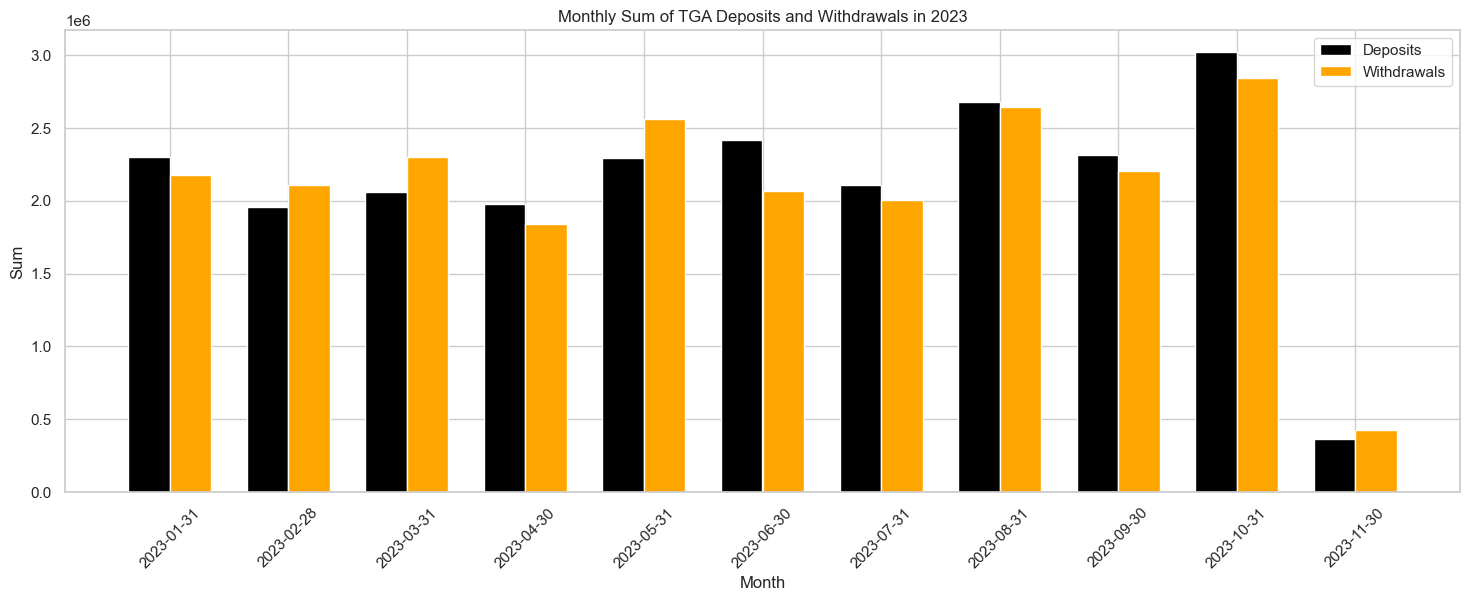

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming monthly_sum_2023 is already defined with the monthly sums

# Extract the data for Deposits and Withdrawals
deposits = monthly_sum_2023["Total TGA Deposits (Table II)"]
withdrawals = monthly_sum_2023["Total TGA Withdrawals (Table II) (-)"]
months = monthly_sum_2023.index

# Format the month labels to display only YY-MM-DD
formatted_months = [month.strftime('%Y-%m-%d') for month in months]

# Define the width of the bars
bar_width = 0.35

# Create an array for the x-axis positions
x = np.arange(len(formatted_months))

# Create the grouped bar chart
plt.figure(figsize=(18, 6))

plt.bar(x - bar_width/2, deposits, bar_width, label='Deposits', color='black')
plt.bar(x + bar_width/2, withdrawals, bar_width, label='Withdrawals', color='orange')

plt.title('Monthly Sum of TGA Deposits and Withdrawals in 2023')
plt.xlabel('Month')
plt.ylabel('Sum')
plt.xticks(x, formatted_months, rotation=45)
plt.legend()

plt.show()


In [48]:
# Assuming monthly_sum_2023 is already defined with the monthly sums

# Extract the last month's data for Deposits and Withdrawals
last_month_deposits = monthly_sum_2023["Total TGA Deposits (Table II)"].iloc[-1]
last_month_withdrawals = monthly_sum_2023["Total TGA Withdrawals (Table II) (-)"].iloc[-1]

# Print the values
print("Last Month Deposits:", last_month_deposits)
print("Last Month Withdrawals:", last_month_withdrawals)


Last Month Deposits: 365867
Last Month Withdrawals: 424109
